In [1]:
#Import Data Manipulation Libraries
import pandas as pd
import numpy as np
    #Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 
#import data filter warning libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Data using URL from Github

url = 'https://raw.githubusercontent.com/vikasmishra0921/SupplyChain/refs/heads/main/SCM.csv'

df = pd.read_csv(url)
df.sample(frac=1) #Data Shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
6315,WH_106315,EID_56315,Rural,Large,West,Zone 5,7,2,2,5020,...,0,183,32.0,2021.0,0,0,NaN,0,14,8058
17566,WH_117566,EID_67566,Rural,Small,North,Zone 6,5,0,2,6182,...,1,227,32.0,NaN,11,0,A,6,13,14143
20589,WH_120589,EID_70589,Rural,Small,West,Zone 1,1,1,2,6291,...,0,153,18.0,NaN,20,0,B,3,21,23107
2461,WH_102461,EID_52461,Rural,Large,West,Zone 6,3,0,4,3980,...,1,189,29.0,2015.0,13,0,A,4,6,18119
21589,WH_121589,EID_71589,Rural,Small,North,Zone 1,5,0,3,7304,...,1,60,37.0,2004.0,24,0,C,2,30,30064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,WH_100958,EID_50958,Rural,Large,South,Zone 5,2,0,3,5153,...,1,123,29.0,NaN,30,0,B+,5,14,36148
9935,WH_109935,EID_59935,Rural,Large,North,Zone 6,7,3,2,3948,...,0,259,19.0,NaN,14,0,B,2,29,16089
9726,WH_109726,EID_59726,Rural,Mid,West,Zone 4,4,0,7,8268,...,1,87,27.0,2019.0,5,0,C,3,11,6149
2655,WH_102655,EID_52655,Rural,Mid,West,Zone 4,5,0,2,4103,...,0,227,48.0,2007.0,20,1,A+,4,26,26145


In [3]:
#Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
#Checking data description : Univariate analysis
'''The Following data is found to be non-normal distributed since mean is not equal to median'''
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


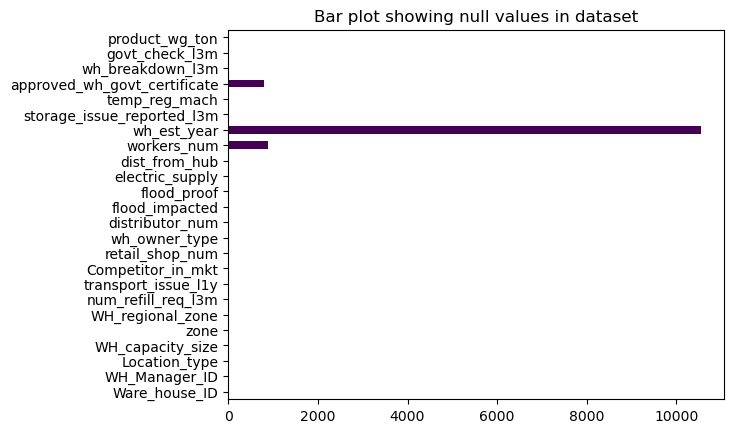

In [5]:
# Cheking the null values in dataset
df.isnull().sum().plot(kind ='barh',cmap ='viridis')
plt.title('Bar plot showing null values in dataset')
plt.show()

In [11]:
# Imputing the missing value column
df['wh_est_year'].fillna(2009,inplace = True)

In [13]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode(),inplace = True)